NAME : VISHWAKARMA POOJA RAMASHANKAR 
SR.NO : 00-0-0-40-52-22-1-21633

Steps:
Created the 2377.csv dataset and utilized SVM and MLP classification.

In [13]:
# Importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [14]:
data_df = pd.read_csv("../data/RawLeakData/2377.csv")
print(data_df.shape)
print(data_df["Meter ID"].unique())
data_df["Date"] = pd.to_datetime(data_df["Date"], errors='coerce')
data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.hour, unit='h')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.minute, unit='m')
data_df = data_df.drop(['Time'],axis=1)
data_df = data_df.set_axis(['Leak', 'Date', 'Flowrate', 'Netflow', 'Pressure', 'ID'], axis=1)
data_df.loc[(data_df["ID"] == 'SE3DM0602'), "ID"] = 1
data_df.loc[(data_df["ID"] == 'SE3DM0601'), "ID"] = 2
data_df.loc[(data_df["ID"] == 'SE3DM0304'), "ID"] = 3
data_df.loc[(data_df["ID"] == 'SE3DM0501'), "ID"] = 4
data_df.loc[(data_df["ID"] == 'SE3DM0401'), "ID"] = 5

filtered_df1 = data_df.loc[(data_df['ID'] == 1)]
filtered_df2 = data_df.loc[(data_df['ID'] == 2)]
filtered_df3 = data_df.loc[(data_df['ID'] == 3)]
filtered_df4 = data_df.loc[(data_df['ID'] == 4)]
filtered_df5 = data_df.loc[(data_df['ID'] == 5)]

dta = pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(filtered_df1,filtered_df2,on='Date',suffixes=("_1","_2")), 
                filtered_df3,on='Date', suffixes=("_3","_4")
            ), 
        filtered_df4,on="Date",suffixes=("_5","_6")
        ),
      filtered_df5,on="Date",suffixes=("_7","_8")
    )
# Apply z-score normalization and filtering for Flowrate columns
for i in range(1, 11):
    flowrate_column = f"Flowrate_{i}"
    if flowrate_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[flowrate_column] = pd.to_numeric(dta[flowrate_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[flowrate_column]], nan_policy='omit')) < 2).all(axis=1)]

# Apply z-score normalization and filtering for Pressure columns
for i in range(1, 11):
    pressure_column = f"Pressure_{i}"
    if pressure_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[pressure_column] = pd.to_numeric(dta[pressure_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[pressure_column]], nan_policy='omit')) < 2).all(axis=1)]
dta.loc[:,"LeakStatus"] = 0
dta.loc[(dta['Date'] >= '2017-10-01') & (dta['Date'] <= '2017-12-09'), "LeakStatus"] = 1
# TODO: To check with Sir
# fig, axs = plt.subplots(1, 1)
# #plt.ylim((0,20))
# plt.xticks(rotation=90)
# axs.scatter(dta["Date"],dta["Pressure_2"], marker='*', s=1)
# #axs.scatter(filtered_pdf2["Date"],filtered_pdf2["Pressure"], c='g', marker='.', s=1)
# #axs.scatter(filtered_pdf3["Date"],filtered_pdf3["Pressure"], c='r', marker='.', s=1)
# #axs.scatter(filtered_pdf4["Date"],filtered_pdf4["Pressure"], c='y', marker='.', s=1)
# axs.axvline(x = pd.Timestamp('2017-12-09'), color = 'r')
# Creating the directory if it doesn't exist
output_directory = "../data/EachLeakData"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
dta.to_csv("../data/EachLeakData/2377.csv", index=False)

(232608, 7)
['SE3DM0602' 'SE3DM0601' 'SE3DM0304' 'SE3DM0501' 'SE3DM0401']


/var/folders/wv/c6by5h8d0tz81wvfwp8rr4g40000gn/T/ipykernel_55899/1073964159.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')


In [15]:
print(dta.shape)
print(dta.isna().sum())
print(dta.columns)
dta

(22664, 27)
Leak_1        0
Date          0
Flowrate_1    0
Netflow_1     0
Pressure_1    0
ID_1          0
Leak_2        0
Flowrate_2    0
Netflow_2     0
Pressure_2    0
ID_2          0
Leak_5        0
Flowrate_5    0
Netflow_5     0
Pressure_5    0
ID_5          0
Leak_6        0
Flowrate_6    0
Netflow_6     0
Pressure_6    0
ID_6          0
Leak          0
Flowrate      0
Netflow       0
Pressure      0
ID            0
LeakStatus    0
dtype: int64
Index(['Leak_1', 'Date', 'Flowrate_1', 'Netflow_1', 'Pressure_1', 'ID_1',
       'Leak_2', 'Flowrate_2', 'Netflow_2', 'Pressure_2', 'ID_2', 'Leak_5',
       'Flowrate_5', 'Netflow_5', 'Pressure_5', 'ID_5', 'Leak_6', 'Flowrate_6',
       'Netflow_6', 'Pressure_6', 'ID_6', 'Leak', 'Flowrate', 'Netflow',
       'Pressure', 'ID', 'LeakStatus'],
      dtype='object')


,Leak_1,Date,Flowrate_1,Netflow_1,Pressure_1,ID_1,Leak_2,Flowrate_2,Netflow_2,Pressure_2,...,Flowrate_6,Netflow_6,Pressure_6,ID_6,Leak,Flowrate,Netflow,Pressure,ID,LeakStatus
68,1,2017-05-27 11:30:00,0.0,422345.8,1.20,1,1,25.17,749652.4,10.84,...,3.92,345820.1,10.48,4,1,0.05,127310.1,1.36,5,0
69,1,2017-05-27 11:45:00,0.0,422345.8,1.20,1,1,22.40,749658.1,10.84,...,2.79,345820.4,10.44,4,1,0.16,127310.1,1.36,5,0
70,1,2017-05-27 12:00:00,0.0,422345.8,1.20,1,1,23.88,749664.0,10.92,...,5.80,345821.8,10.60,4,1,0.00,127310.1,1.36,5,0
71,1,2017-05-27 12:15:00,0.0,422345.8,1.20,1,1,24.42,749670.1,10.84,...,4.37,345822.5,10.72,4,1,0.01,127310.1,1.32,5,0
72,1,2017-05-27 12:30:00,0.0,422345.8,1.20,1,1,22.41,749675.7,10.84,...,3.43,345823.2,10.72,4,1,0.00,127310.1,1.36,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28728,1,2018-04-17 13:45:00,0.0,514761.1,1.32,1,1,0.00,1003298.0,10.68,...,0.16,1436082.0,8.36,4,1,0.00,279972.1,1.48,5,0
28729,1,2018-04-17 14:00:00,0.0,514761.1,1.28,1,1,0.00,1003298.0,10.72,...,1.01,1436082.0,8.24,4,1,0.00,279972.1,1.56,5,0
28730,1,2018-04-17 14:15:00,0.0,514761.1,1.20,1,1,0.00,1003298.0,10.72,...,5.51,1436084.0,8.24,4,1,0.00,279972.1,1.56,5,0
28731,1,2018-04-17 14:30:00,0.0,514761.1,1.20,1,1,0.00,1003298.0,10.72,...,2.79,1436084.0,8.36,4,1,0.00,279972.1,1.56,5,0


In [16]:
# Selecting the features and target
X = dta[['Leak_1', 'Flowrate_1', 'Pressure_1', 'Flowrate_2', 'Pressure_2',
         'Flowrate_5', 'Pressure_5', 'Flowrate_6', 'Pressure_6',
         'Flowrate', 'Pressure']]
y = dta['LeakStatus']
print(X)
print(y)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Leak_1  Flowrate_1  Pressure_1  Flowrate_2  Pressure_2  Flowrate_5  \
68          1         0.0        1.20       25.17       10.84        2.75   
69          1         0.0        1.20       22.40       10.84        2.77   
70          1         0.0        1.20       23.88       10.92        1.58   
71          1         0.0        1.20       24.42       10.84        6.27   
72          1         0.0        1.20       22.41       10.84        4.40   
...       ...         ...         ...         ...         ...         ...   
28728       1         0.0        1.32        0.00       10.68        7.56   
28729       1         0.0        1.28        0.00       10.72        2.63   
28730       1         0.0        1.20        0.00       10.72        2.12   
28731       1         0.0        1.20        0.00       10.72        1.70   
28732       1         0.0        1.28        0.00       10.72        2.50   

       Pressure_5  Flowrate_6  Pressure_6  Flowrate  Pressure  
68         

SVM Accuracy: 0.28
Train Accuracy: 0.27672718103883004
Test Accuracy: 0.2777941176470588
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.08      0.14      5198
           1       0.24      0.93      0.38      1602

    accuracy                           0.28      6800
   macro avg       0.51      0.50      0.26      6800
weighted avg       0.66      0.28      0.19      6800

[[1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]]


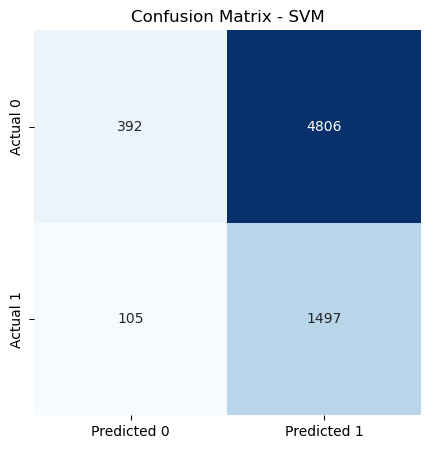

MLP Accuracy: 0.80
Train Accuracy: 0.8576651538073626
Test Accuracy: 0.8025
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5198
           1       0.61      0.45      0.52      1602

    accuracy                           0.80      6800
   macro avg       0.73      0.68      0.70      6800
weighted avg       0.79      0.80      0.79      6800

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


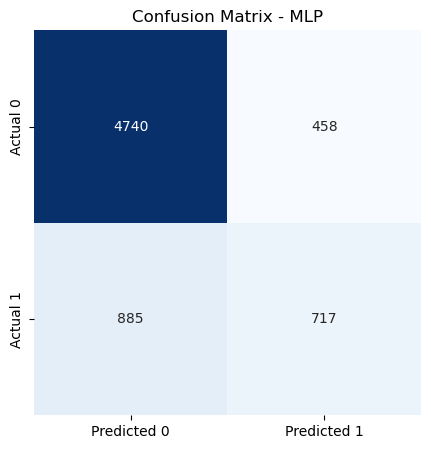

In [17]:
modelDir = '../data/EachLeakModel'
if not os.path.exists(modelDir):
    os.makedirs(modelDir)

# Defining the models to evaluate
models = [
    ('SVM', SVC(C=3000000.0, kernel='rbf', class_weight='balanced')),
    ('MLP', MLPClassifier(hidden_layer_sizes=(1000, 100, 10), activation='relu', max_iter=3000000000))
]

# Loop through each model and evaluate
for name, model in models:
    # Training the model on the training data
    model.fit(X_train, y_train)
    # Saving the trained model
    ModelName = os.path.join(modelDir, f'{name}_2377.pkl')
    joblib.dump(model, ModelName)
    # Making predictions on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f'Train Accuracy: {model.score(X_train, y_train)}')
    print(f'Test Accuracy: {model.score(X_test, y_test)}')
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Printing the first 25 rows of predictions and actual values
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)[:25])

   # Plotting confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()